In [1]:
import os
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.metrics import AUC, Precision, Recall
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_recall_curve
from tensorflow.keras.metrics import AUC, Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, precision_recall_curve, precision_score, recall_score

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


1 Physical GPUs, 1 Logical GPUs


In [2]:
# import os
# import numpy as np
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Data Enhancement Configuration
# datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=10,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.1,
#     horizontal_flip=True,
#     vertical_flip=True,
#     fill_mode='reflect'
# )

# def augment_images(data_dir, class_name, augmented_dir, target_count):

#     save_class_dir = os.path.join(augmented_dir, class_name)
#     if not os.path.exists(save_class_dir):
#         os.makedirs(save_class_dir)

#     current_count = len(os.listdir(os.path.join(data_dir, class_name)))
#     additional_count = target_count - current_count
#     print(f"类别 '{class_name}' 当前有 {current_count} 张图像, 需要增加 {additional_count} 张图像。")
    
#     if additional_count <= 0:
#         print(f"类别 '{class_name}' 已经达到或超过目标数量。")
#         return

#     # Generate data-enhanced images
#     generator = datagen.flow_from_directory(
#         directory=data_dir,
#         classes=[class_name],
#         target_size=(256, 256),
#         batch_size=32,
#         class_mode='categorical',
#         save_to_dir=save_class_dir,
#         save_prefix='aug_',
#         save_format='png',
#         color_mode='rgb'  
#     )
    
#     num_batches = int(np.ceil(additional_count / generator.batch_size))
    
#     for i in range(num_batches):
#         images, _ = next(generator)
#         # If a sufficient number of images have been generated, exit the loop
#         if len(os.listdir(save_class_dir)) >= target_count:
#             break
#     print(f"类别 '{class_name}' 图像增强完成。")

# # Original dataset directory
# original_dataset_dir = r'C:\Users\FOMO\Desktop\MV\202018010315_MV_Coursework\images\wheat_leaf'
# # Enhanced dataset directory
# augmented_dataset_dir = r'C:\Users\FOMO\Desktop\MV\202018010315_MV_Coursework\images\augmented_dataset'
# if not os.path.exists(augmented_dataset_dir):
#     os.makedirs(augmented_dataset_dir)

# # Data enhancement for each category separately
# for class_name in ['healthy', 'unhealthy']:
#     augment_images(original_dataset_dir, class_name, augmented_dataset_dir, 2000)

# print("所有类别的图像增强完成。")

In [3]:
# import os
# import shutil
# import numpy as np
# import matplotlib.pyplot as plt

# def split_dataset(original_dir, target_dir, train_ratio=0.85, val_ratio=0.1):
#     if not os.path.exists(target_dir):
#         os.makedirs(target_dir)
#         os.makedirs(os.path.join(target_dir, 'train'))
#         os.makedirs(os.path.join(target_dir, 'validation'))
#         os.makedirs(os.path.join(target_dir, 'test'))

#     classes = [d for d in os.listdir(original_dir) if os.path.isdir(os.path.join(original_dir, d))]

#     for cls in classes:
#         os.makedirs(os.path.join(target_dir, 'train', cls), exist_ok=True)
#         os.makedirs(os.path.join(target_dir, 'validation', cls), exist_ok=True)
#         os.makedirs(os.path.join(target_dir, 'test', cls), exist_ok=True)

#         all_images = os.listdir(os.path.join(original_dir, cls))
#         np.random.shuffle(all_images)

#         train_end = int(len(all_images) * train_ratio)
#         val_end = train_end + int(len(all_images) * val_ratio)

#         for i, img in enumerate(all_images):
#             if i < train_end:
#                 subset = 'train'
#             elif i < val_end:
#                 subset = 'validation'
#             else:
#                 subset = 'test'

#             src = os.path.join(original_dir, cls, img)
#             dst = os.path.join(target_dir, subset, cls, img)
#             shutil.copy(src, dst)

# def count_images_in_subfolders(directory):
#     counts = {}
#     for subset in ['train', 'validation', 'test']:
#         subset_path = os.path.join(directory, subset)
#         for cls in os.listdir(subset_path):
#             class_path = os.path.join(subset_path, cls)
#             if os.path.isdir(class_path):
#                 count = len(os.listdir(class_path))
#                 counts[f"{subset}/{cls}"] = count
#     return counts

# def visualize_data_split(train_dir, validation_dir, test_dir):
#     categories = set()
#     data = {'train': {}, 'validation': {}, 'test': {}}

#     for dataset, directory in zip(['train', 'validation', 'test'], [train_dir, validation_dir, test_dir]):
#         for category in os.listdir(directory):
#             category_path = os.path.join(directory, category)
#             if os.path.isdir(category_path):
#                 categories.add(category)
#                 data[dataset][category] = len(os.listdir(category_path))

#     categories = sorted(list(categories))
    
#     train_counts = [data['train'].get(category, 0) for category in categories]
#     val_counts = [data['validation'].get(category, 0) for category in categories]
#     test_counts = [data['test'].get(category, 0) for category in categories]

#     bar_width = 0.35
#     index = np.arange(len(categories))

#     plt.figure(figsize=(10, 6))

#     plt.bar(index, train_counts, bar_width, label='Train', color='b')
#     plt.bar(index, val_counts, bar_width, bottom=train_counts, label='Validation', color='r')
#     plt.bar(index, test_counts, bar_width, bottom=np.array(train_counts) + np.array(val_counts), label='Test', color='g')

#     plt.xlabel('Category')
#     plt.ylabel('Number of Images')
#     plt.title('Number of Images per Category Across Datasets')
#     plt.xticks(index, categories)
#     plt.legend()

#     plt.tight_layout()
#     plt.show()

# augmented_dataset_dir = r'C:\Users\FOMO\Desktop\MV\202018010315_MV_Coursework\images\augmented_dataset'
# splited_dataset_dir = r"C:\Users\FOMO\Desktop\MV\202018010315_MV_Coursework\images\splited_dataset"

# split_dataset(augmented_dataset_dir, splited_dataset_dir)

# counts = count_images_in_subfolders(splited_dataset_dir)
# for key, count in counts.items():
#     print(f"{key}: {count} images")

# train_dir = os.path.join(splited_dataset_dir, 'train')
# validation_dir = os.path.join(splited_dataset_dir, 'validation')
# test_dir = os.path.join(splited_dataset_dir, 'test')

# visualize_data_split(train_dir, validation_dir, test_dir)

Found 2677 images belonging to 2 classes.
Found 315 images belonging to 2 classes.
Found 159 images belonging to 2 classes.


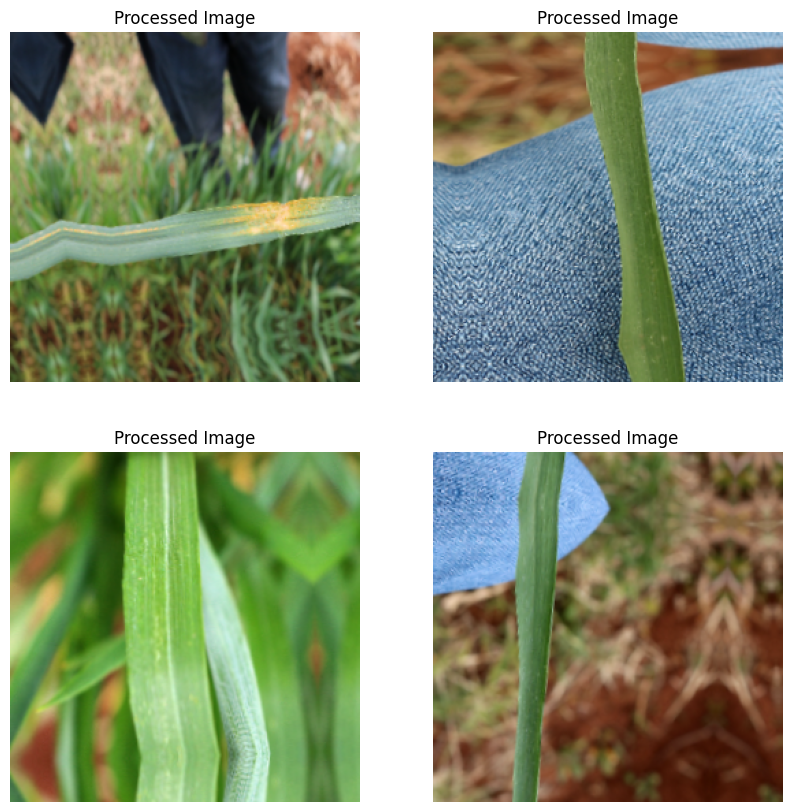

In [4]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

def preprocess_wheat_leaves_data():
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,  # Wheat leaves can appear in any direction
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.1,
        shear_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,  # Up and down turning of wheat leaves
        fill_mode='reflect'  # Use reflection
    )
    val_test_datagen = ImageDataGenerator(
        rescale=1./255,
    )
    return train_datagen, val_test_datagen

# Create a function to save an image to a specified directory
def load_wheat_leaves_datasets(train_datagen, val_test_datagen, batch_size=32, target_size=(256,256)):
    train_dir = r"C:\Users\FOMO\Desktop\MV\202018010315_MV_Coursework\images\splited_dataset\train"
    val_dir = r"C:\Users\FOMO\Desktop\MV\202018010315_MV_Coursework\images\splited_dataset\validation"
    test_dir = r"C:\Users\FOMO\Desktop\MV\202018010315_MV_Coursework\images\splited_dataset\test"

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical', 
        color_mode='rgb'
    )

    validation_generator = val_test_datagen.flow_from_directory(
        val_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        color_mode='rgb'
    )

    test_generator = val_test_datagen.flow_from_directory(
        test_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        color_mode='rgb'
    )

    return train_generator, validation_generator, test_generator

train_datagen, val_test_datagen = preprocess_wheat_leaves_data()
train_generator, validation_generator, test_generator = load_wheat_leaves_datasets(train_datagen, val_test_datagen)

# Extract a batch of images and labels from train_generator
batch_images, batch_labels = next(train_generator)

# Setting the number of images to visualize
num_images = 4

plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(2, 2, i + 1)
    plt.imshow(batch_images[i])
    plt.title('Processed Image')
    plt.axis('off')

plt.show()

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

def resnet_block(input_tensor, filters, kernel_size=3, stride=2, conv_shortcut=True):
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding="same")(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(filters, kernel_size, padding="same")(x)
    x = layers.BatchNormalization()(x)

    if conv_shortcut:
        shortcut = layers.Conv2D(filters, 1, strides=stride, padding="same")(input_tensor)
        shortcut = layers.BatchNormalization()(shortcut)
    else:
        shortcut = input_tensor

    x = layers.add([x, shortcut])
    x = layers.Activation("relu")(x)
    return x

def inception_block(input_tensor, filters):
    branch1 = layers.Conv2D(filters, (1, 1), padding='same', activation='relu')(input_tensor)

    branch2 = layers.Conv2D(filters, (3, 3), padding='same', activation='relu')(input_tensor)

    branch3 = layers.Conv2D(filters, (5, 5), padding='same', activation='relu')(input_tensor)

    branch4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_tensor)
    branch4 = layers.Conv2D(filters, (1, 1), padding='same', activation='relu')(branch4)

    output = layers.concatenate([branch1, branch2, branch3, branch4], axis=-1)
    return output

def spatial_attention(input_tensor):
    kernel_size = 7
    avg_pool = layers.Lambda(lambda x: tf.reduce_mean(x, axis=-1, keepdims=True))(input_tensor)
    max_pool = layers.Lambda(lambda x: tf.reduce_max(x, axis=-1, keepdims=True))(input_tensor)
    concat = layers.concatenate([avg_pool, max_pool], axis=-1)
    attention = layers.Conv2D(1, kernel_size, padding='same', activation='sigmoid')(concat)
    return layers.multiply([input_tensor, attention])

def create_custom_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    # ResNet and Inception Modules
    x = resnet_block(inputs, 64)
    x = resnet_block(x, 32)
    x = resnet_block(x, 32)
    # Spatial attention mechanisms
    x = spatial_attention(x)

    x = inception_block(x, 32)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = inception_block(x, 32)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = inception_block(x, 32)
    # Spatial attention mechanisms
    x = spatial_attention(x)
    # Global average pooling and output layer
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)  # Add dropout
    outputs = layers.Dense(2, activation='softmax')(x) 

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

In [6]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = create_custom_model((256,256, 3))  
model.summary()

learning_rate = 0.001  
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy',Precision(name='precision'), Recall(name='recall')])

# Creating Callback Functions
early_stopping = EarlyStopping(monitor='val_loss', patience=10)  # Stop training when val_loss doesn't improve for 10 epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)  # When val_loss does not improve in 5 epochs, the learning rate is reduced to 20% of the original, down to 0.0001

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 128, 128, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [7]:
# training model
history = model.fit(
    train_generator,
    epochs=40,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/40
84/84 [==============================] - 44s 468ms/step - loss: 0.4721 - accuracy: 0.7762 - precision: 0.7762 - recall: 0.7762 - val_loss: 0.9944 - val_accuracy: 0.4952 - val_precision: 0.4952 - val_recall: 0.4952 - lr: 0.0010
Epoch 2/40
84/84 [==============================] - 36s 433ms/step - loss: 0.2852 - accuracy: 0.8801 - precision: 0.8801 - recall: 0.8801 - val_loss: 1.0264 - val_accuracy: 0.5556 - val_precision: 0.5556 - val_recall: 0.5556 - lr: 0.0010
Epoch 3/40
84/84 [==============================] - 39s 466ms/step - loss: 0.2285 - accuracy: 0.9059 - precision: 0.9059 - recall: 0.9059 - val_loss: 1.0513 - val_accuracy: 0.5968 - val_precision: 0.5968 - val_recall: 0.5968 - lr: 0.0010
Epoch 4/40
84/84 [==============================] - 38s 452ms/step - loss: 0.1740 - accuracy: 0.9275 - precision: 0.9275 - recall: 0.9275 - val_loss: 0.6515 - val_accuracy: 0.7397 - val_precision: 0.7397 - val_recall: 0.7397 - lr: 0.0010
Epoch 5/40
84/84 [==============================

In [8]:
evaluation_result = model.evaluate(test_generator, steps=5)

5/5 [==============================] - 1s 255ms/step - loss: 1.7153e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000


In [9]:
model.save('try/model_NoAttentionMechanism.h5')  # Save Model
model_path = 'try/model_NoAttentionMechanism.h5'

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, precision_score, recall_score, f1_score
from tensorflow.keras.models import load_model

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [11]:
loaded_model = load_model(model_path)

all_images = []
all_true_labels = []

for _ in range(test_generator.samples // test_generator.batch_size):
    images, true_labels = next(test_generator)
    all_images.extend(images)
    all_true_labels.extend(true_labels)

all_images = np.array(all_images)
all_true_labels = np.argmax(np.array(all_true_labels), axis=1)

predictions = loaded_model.predict(all_images)
predicted_labels = np.argmax(predictions, axis=1)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
precision = history.history['precision']
val_precision = history.history['val_precision']
recall = history.history['recall']
val_recall = history.history['val_recall']

epochs = range(len(acc))

4/4 [==============================] - 0s 33ms/step


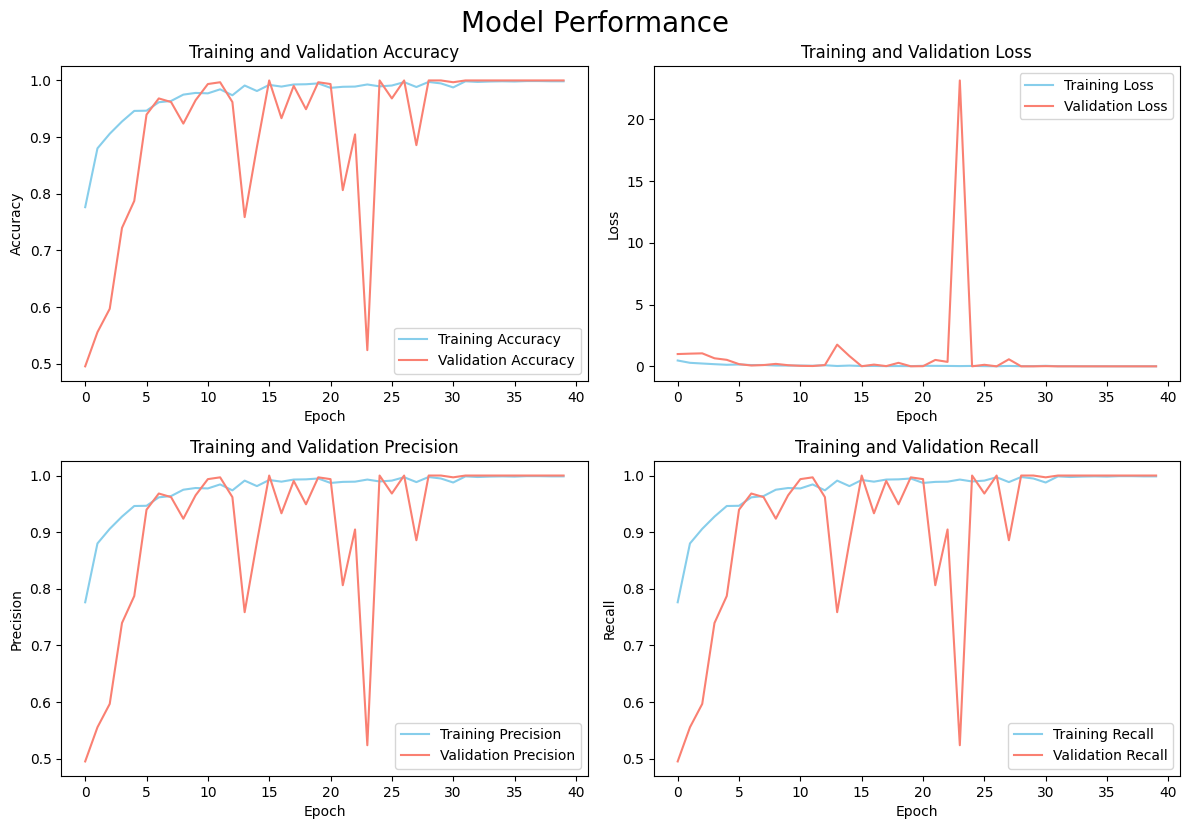

In [12]:
plt.figure(figsize=(12, 12))

# Accuracy
plt.subplot(3, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy', color='skyblue')
plt.plot(epochs, val_acc, label='Validation Accuracy', color='salmon')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(3, 2, 2)
plt.plot(epochs, loss, label='Training Loss', color='skyblue')
plt.plot(epochs, val_loss, label='Validation Loss', color='salmon')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Precision
plt.subplot(3, 2, 3)
plt.plot(epochs, precision, label='Training Precision', color='skyblue')
plt.plot(epochs, val_precision, label='Validation Precision', color='salmon')
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

# Recall
plt.subplot(3, 2, 4)
plt.plot(epochs, recall, label='Training Recall', color='skyblue')
plt.plot(epochs, val_recall, label='Validation Recall', color='salmon')
plt.title('Training and Validation Recall')
plt.xlabel('Epoch',)
plt.ylabel('Recall')
plt.legend()

plt.suptitle("Model Performance", fontsize=20)
plt.tight_layout()
plt.show()

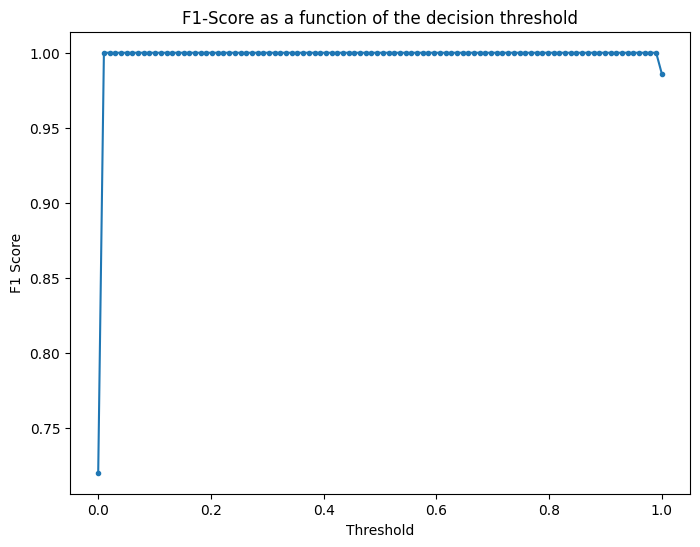

In [13]:
thresholds = np.linspace(0, 1, 100)
f1_scores = []

for thresh in thresholds:
    predicted_labels_thresh = (predictions[:, 1] >= thresh).astype(int)

    precision = precision_score(all_true_labels, predicted_labels_thresh, zero_division=0)
    recall = recall_score(all_true_labels, predicted_labels_thresh)

    if precision + recall == 0:
        f1_scores.append(0)
    else:
        f1 = 2 * (precision * recall) / (precision + recall)
        f1_scores.append(f1)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, marker='.')
plt.title('F1-Score as a function of the decision threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.show()

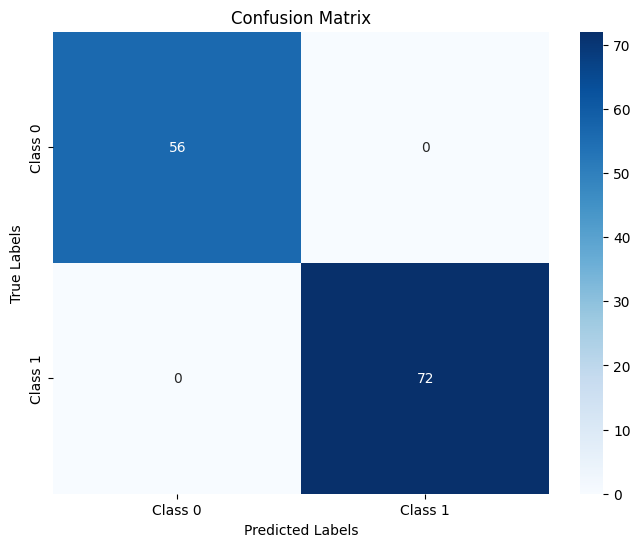

In [14]:
conf_matrix = confusion_matrix(all_true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

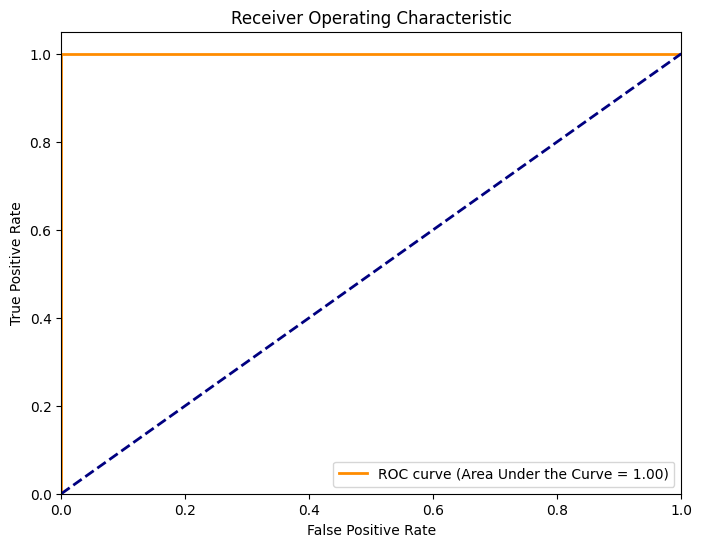

In [15]:
fpr, tpr, thresholds = roc_curve(all_true_labels, predictions[:, 1])  # 假设正类为索引1
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (Area Under the Curve = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

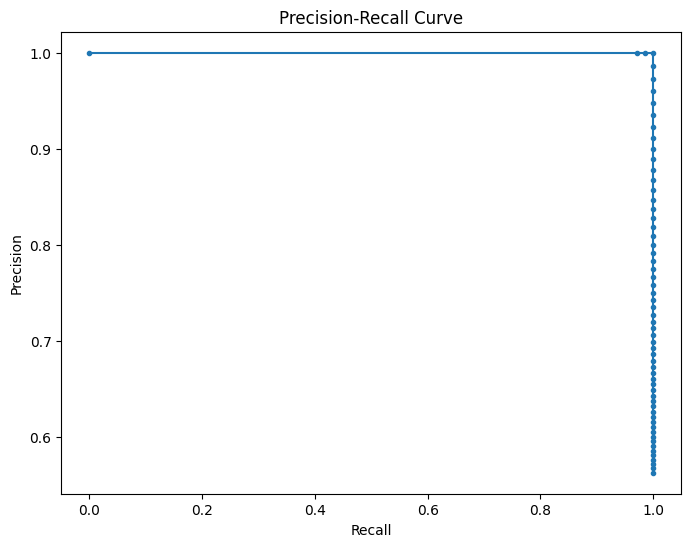

In [16]:
precision, recall, _ = precision_recall_curve(all_true_labels, predictions[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [17]:
thresholds = np.linspace(0, 1, 100)
sensitivity_scores = []
specificity_scores = []

for thresh in thresholds:
    predicted_labels_thresh = (predictions[:, 1] >= thresh).astype(int)

    tn, fp, fn, tp = confusion_matrix(all_true_labels, predicted_labels_thresh).ravel()

    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)

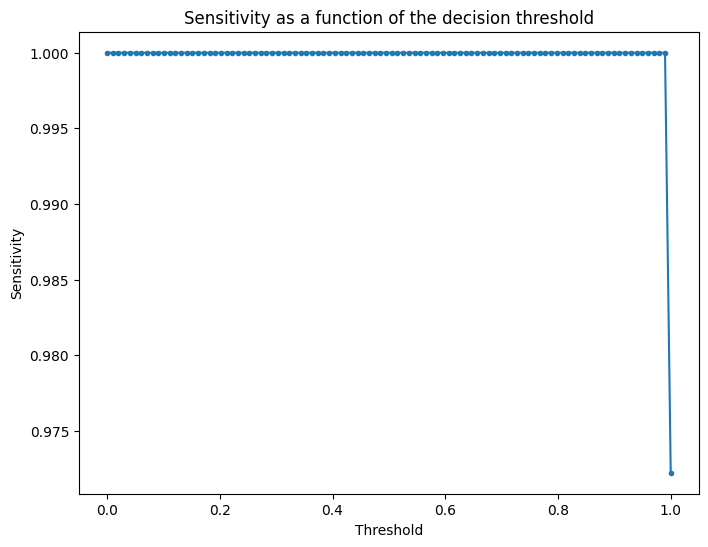

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, sensitivity_scores, marker='.')
plt.title('Sensitivity as a function of the decision threshold')
plt.xlabel('Threshold')
plt.ylabel('Sensitivity')
plt.show()

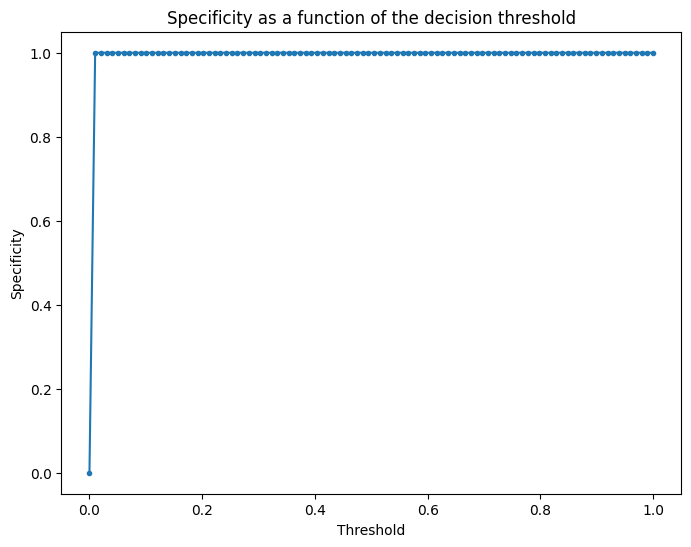

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, specificity_scores, marker='.')
plt.title('Specificity as a function of the decision threshold')
plt.xlabel('Threshold')
plt.ylabel('Specificity')
plt.show()

In [20]:
cm = confusion_matrix(all_true_labels, predicted_labels)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
precision = precision_score(all_true_labels, predicted_labels)
recall = recall_score(all_true_labels, predicted_labels)
f1 = f1_score(all_true_labels, predicted_labels)
auc = roc_auc_score(all_true_labels, predictions[:, 1]) if predictions is not None else "N/A"

In [21]:
print("Image Classification Report:")
print(classification_report(all_true_labels, predicted_labels))
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {auc}")
print("Confusion Matrix:")
print(cm)

Image Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        72

    accuracy                           1.00       128
   macro avg       1.00      1.00      1.00       128
weighted avg       1.00      1.00      1.00       128

Sensitivity: 1.00
Specificity: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
AUC: 1.0
Confusion Matrix:
[[56  0]
 [ 0 72]]
